# Data Exploration: GenAI

In [61]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [88]:
import kagglehub
from pathlib import Path

# Download latest version
path = kagglehub.dataset_download("aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'of-genomes-and-genetics-hackerearth-ml-challenge' dataset.
Path to dataset files: /kaggle/input/of-genomes-and-genetics-hackerearth-ml-challenge


In [89]:
data_path = Path("/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1")
for item in data_path.iterdir():
    print(item)

/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1/sample_submission.csv
/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1/test.csv
/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1/train.csv


### Read the data

In [90]:
train_path = "/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1/train.csv"
train = pd.read_csv(train_path) #shape ---> (22083, 45)
train.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [91]:
test_path = "/root/.cache/kagglehub/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/versions/1/test.csv"
test = pd.read_csv(test_path)
test.head() #---> (9465, 43)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,...,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,...,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,...,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,...,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,...,No,-99,Multiple,6.195178,normal,True,True,True,True,False


### DATA DESCRIPTION

| Column name | Description |
| :----------- | :----------- |
| Patient_Id | Represents the unique identification number of a patient |
| Patient_Age | Represents the age of a patient |
| Genes_in_mother's_side | Represents a gene defect in a patient’s mother |
| Inherited_from_father | Represents a gene defect in a patient’s father |
| Maternal_gene | Represents a gene defect in the patient’s maternal side of the family |
| Paternal_gene | Represents a gene defect in a patient’s paternal side of the family |
| Blood_cell_count_(mCL) | Represents the blood cell count of a patient |
| Patient_First_Name | Represents a patient’s first name |
| Family_Name | Represents a patient’s family name or surname |
| Father’s_name | Represents a patient’s father’s name |
| Mother’s_name | Represents a patient’s mother’s name |
| Father’s_age | Represents a patient’s father’s age |
| Mother’s_age | Represents a patient’s mother’s age |
| Institute_Name | Represents the medical institute where a patient was born |
| Location_of_Institute | Represents the location of the medical institute |
| Status | Represents whether a patient is deceased |
| Respiratory_Rate_(breaths/min) | Represents a patient’s respiratory breathing rate |
| Heart_Rate_(rates/min) | Represents a patient’s heart rate |
| Test_1–Test_5 | Represents different (masked) tests that were conducted on a patient |
| Parental_consent | Represents whether a patient’s parents approved the treatment plan |
| Follow-up | Represents a patient’s level of risk (how intense their condition is) |
| Gender | Represents a patient’s gender |
| Birth_asphyxia | Represents whether a patient suffered from birth asphyxia |
| Autopsy_shows_birth_defect_(if_applicable) | Represents whether a patient’s autopsy showed any birth defects |
| Place_of_birth | Represents whether a patient was born in a medical institute or at home |
| Folic_acid_details_(peri-conceptional) | Represents the periconceptional folic acid supplementation details of a patient |
| H/O_serious_maternal_illness | Represents an unexpected outcome of labor or delivery that resulted in significant short or long-term consequences to the patient’s mother |
| H/O_radiation_exposure_(x-ray) | Represents whether a patient has any radiation exposure history |
| H/O_substance_abuse | Represents whether a parent has a history of drug addiction |
| Assisted_conception_IVF/ART | Represents the type of treatment used for infertility |
| History_of_anomalies_in_previous_pregnancies | Represents whether the mother had any anomalies in her previous pregnancies |
| No._of_previous_abortion | Represents the number of abortions that a mother had |
| Birth_defects | Represents whether a patient has birth defects |
| White_Blood_cell_count_(thousand_per_microliter) | Represents a patient’s white blood cell count |
| Blood_test_result | Represents a patient’s blood test results |
| Symptom_1–Symptom_5 | Represents (masked) different types of symptoms that a patient had |
| Genetic_Disorder | Represents the genetic disorder that a patient has |
| Disorder_Subclass | Represents the subclass of the disorder |


#### Our TARGET:

* Genetic Disorder
* Disorder Subclass

### Rename columns

In [66]:
train.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [92]:
train.rename(columns={
    "Patient Id": "Patient_Id",
    "Patient Age": "Patient_Age",
    "Genes in mother's side": "Genes_Mother_Side",
    "Inherited from father": "Inherited_Father",
    "Maternal gene": "Maternal_Gene",
    "Paternal gene": "Paternal_Gene",
    "Blood cell count (mcL)": "Blood_Cell_mcL",
    "Patient First Name": "Patient_First_Name",
    "Family Name": "Family_Name",
    "Father's name": "Father_Name",
    "Mother's age": "Mother_Age",
    "Father's age": "Father_Age",
    "Institute Name": "Institute_Name",
    "Location of Institute": "Institute_Location",
    "Status": "Status",
    "Respiratory Rate (breaths/min)": "Respiratory_Rate_Breaths_Min",
    "Heart Rate (rates/min": "Heart_Rates_Min",
    "Test 1": "Test_1",
    "Test 2": "Test_2",
    "Test 3": "Test_3",
    "Test 4": "Test_4",
    "Test 5": "Test_5",
    "Parental consent": "Parental_Consent",
    "Follow-up": "Follow_Up",
    "Gender": "Gender",
    "Birth asphyxia": "Birth_Asphyxia",
    "Autopsy shows birth defect (if applicable)": "Autopsy_Birth_Defect",
    "Place of birth": "Place_Birth",
    "Folic acid details (peri-conceptional)": "Folic_Acid",
    "H/O serious maternal illness": "Maternal_Illness",
    "H/O radiation exposure (x-ray)": "Radiation_Exposure",
    "H/O substance abuse": "Substance_Abuse",
    "Assisted conception IVF/ART": "Assisted_Conception",
    "History of anomalies in previous pregnancies": "History_Previous_Pregnancies",
    "No. of previous abortion": "Previous_Abortion",
    "Birth defects": "Birth_Defects",
    "White Blood cell count (thousand per microliter)": "White_Blood_Cell",
    "Blood test result": "Blood_Test_Result",
    "Symptom 1": "Symptom_1",
    "Symptom 2": "Symptom_2",
    "Symptom 3": "Symptom_3",
    "Symptom 4": "Symptom_4",
    "Symptom 5": "Symptom_5",
    "Genetic Disorder": "Genetic_Disorder",
    "Disorder Subclass": "Disorder_Subclass"
}, inplace=True)

In [93]:
train.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_Mother_Side', 'Inherited_Father',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Father_Name', 'Mother_Age',
       'Father_Age', 'Institute_Name', 'Institute_Location', 'Status',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_Test_Result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Genetic_Disorder', 'Disorder_Subclass'],
      dtype='object')

In [94]:
test.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [95]:
test.rename(columns={
    "Patient Id": "Patient_Id",
    "Patient Age": "Patient_Age",
    "Genes in mother's side": "Genes_Mother_Side",
    "Inherited from father": "Inherited_Father",
    "Maternal gene": "Maternal_Gene",
    "Paternal gene": "Paternal_Gene",
    "Blood cell count (mcL)": "Blood_Cell_mcL",
    "Patient First Name": "Patient_First_Name",
    "Family Name": "Family_Name",
    "Father's name": "Father_Name",
    "Mother's age": "Mother_Age",
    "Father's age": "Father_Age",
    "Institute Name": "Institute_Name",
    "Location of Institute": "Institute_Location",
    "Status": "Status",
    "Respiratory Rate (breaths/min)": "Respiratory_Rate_Breaths_Min",
    "Heart Rate (rates/min": "Heart_Rates_Min",
    "Test 1": "Test_1",
    "Test 2": "Test_2",
    "Test 3": "Test_3",
    "Test 4": "Test_4",
    "Test 5": "Test_5",
    "Parental consent": "Parental_Consent",
    "Follow-up": "Follow_Up",
    "Gender": "Gender",
    "Birth asphyxia": "Birth_Asphyxia",
    "Autopsy shows birth defect (if applicable)": "Autopsy_Birth_Defect",
    "Place of birth": "Place_Birth",
    "Folic acid details (peri-conceptional)": "Folic_Acid",
    "H/O serious maternal illness": "Maternal_Illness",
    "H/O radiation exposure (x-ray)": "Radiation_Exposure",
    "H/O substance abuse": "Substance_Abuse",
    "Assisted conception IVF/ART": "Assisted_Conception",
    "History of anomalies in previous pregnancies": "History_Previous_Pregnancies",
    "No. of previous abortion": "Previous_Abortion",
    "Birth defects": "Birth_Defects",
    "White Blood cell count (thousand per microliter)": "White_Blood_Cell",
    "Blood test result": "Blood_Test_Result",
    "Symptom 1": "Symptom_1",
    "Symptom 2": "Symptom_2",
    "Symptom 3": "Symptom_3",
    "Symptom 4": "Symptom_4",
    "Symptom 5": "Symptom_5"
}, inplace=True)


In [96]:
test.columns

Index(['Patient_Id', 'Patient_Age', 'Genes_Mother_Side', 'Inherited_Father',
       'Maternal_Gene', 'Paternal_Gene', 'Blood_Cell_mcL',
       'Patient_First_Name', 'Family_Name', 'Father_Name', 'Mother_Age',
       'Father_Age', 'Institute_Name', 'Institute_Location', 'Status',
       'Respiratory_Rate_Breaths_Min', 'Heart_Rates_Min', 'Test_1', 'Test_2',
       'Test_3', 'Test_4', 'Test_5', 'Parental_Consent', 'Follow_Up', 'Gender',
       'Birth_Asphyxia', 'Autopsy_Birth_Defect', 'Place_Birth', 'Folic_Acid',
       'Maternal_Illness', 'Radiation_Exposure', 'Substance_Abuse',
       'Assisted_Conception', 'History_Previous_Pregnancies',
       'Previous_Abortion', 'Birth_Defects', 'White_Blood_Cell',
       'Blood_Test_Result', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5'],
      dtype='object')

# Drop columns

In [97]:
#Drop Unnecessary Columns
train.drop("Patient_Id",axis=1,inplace=True)
train.drop("Family_Name",axis=1,inplace=True)
train.drop("Patient_First_Name",axis=1,inplace=True)
train.drop("Father_Name",axis=1,inplace=True)
train.drop("Institute_Name",axis=1,inplace=True)
train.drop("Institute_Location",axis=1,inplace=True)
train.drop("Place_Birth",axis=1,inplace=True)
train.drop("Parental_Consent",axis=1,inplace=True)
train.drop("Test_1",axis=1,inplace=True)
train.drop("Test_2",axis=1,inplace=True)
train.drop("Test_3",axis=1,inplace=True)
train.drop("Test_5",axis=1,inplace=True)

In [98]:
#Drop Unnecessary Columns
test.drop("Patient_Id",axis=1,inplace=True)
test.drop("Family_Name",axis=1,inplace=True)
test.drop("Patient_First_Name",axis=1,inplace=True)
test.drop("Father_Name",axis=1,inplace=True)
test.drop("Institute_Name",axis=1,inplace=True)
test.drop("Institute_Location",axis=1,inplace=True)
test.drop("Place_Birth",axis=1,inplace=True)
test.drop("Parental_Consent",axis=1,inplace=True)
test.drop("Test_1",axis=1,inplace=True)
test.drop("Test_2",axis=1,inplace=True)
test.drop("Test_3",axis=1,inplace=True)
test.drop("Test_5",axis=1,inplace=True)

❓ What is the shape of the dataset (number of rows and columns)?

In [75]:
train.shape

(22083, 33)

In [76]:
test.shape

(9465, 31)

❓ How many numerical features vs. categorical features do we have?



In [14]:
train.dtypes.value_counts()

,count
object,21
float64,12


In [ ]:
test.dtypes.value_counts()

,count
object,19
int64,5
bool,5
float64,2


❓ What are the unique values and their frequencies for each categorical feature in the dataset?

In [102]:
for col in train.select_dtypes(include=['object']).columns:
    print(f"{col} value counts:")
    print(train[col].value_counts())
    print("-"*50)


Genes_Mother_Side value counts:
Genes_Mother_Side
Yes    13143
No      8940
Name: count, dtype: int64
--------------------------------------------------
Inherited_Father value counts:
Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64
--------------------------------------------------
Maternal_Gene value counts:
Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64
--------------------------------------------------
Paternal_Gene value counts:
Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64
--------------------------------------------------
Status value counts:
Status
Alive       11083
Deceased    11000
Name: count, dtype: int64
--------------------------------------------------
Respiratory_Rate_Breaths_Min value counts:
Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64
--------------------------------------------------
Heart_Rates_Min value counts:
Heart_Rates_Min
Normal         10187
T

In [104]:
print("Previous_Abortion VALUES:\n")
print(train["Previous_Abortion"].value_counts())

Previous_Abortion VALUES:

Previous_Abortion
2.0    4117
4.0    4005
0.0    3964
1.0    3928
3.0    3907
Name: count, dtype: int64


### Duplicated valuse

In [105]:
train.duplicated().sum()

np.int64(0)

In [106]:
test.duplicated().sum()

np.int64(0)

### Missing values

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   20656 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              21777 non-null  object 
 3   Maternal_Gene                 19273 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    16047 non-null  float64
 7   Father_Age                    16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19934 non-null  object 
 10  Heart_Rates_Min               19970 non-null  object 
 11  Follow_Up                     19917 non-null  object 
 12  Gender                        19910 non-null  object 
 13  B

In [100]:
missing_train=train.isnull().sum()
missing_train

,0
Patient_Age,1427
Genes_Mother_Side,0
Inherited_Father,306
Maternal_Gene,2810
Paternal_Gene,0
Blood_Cell_mcL,0
Mother_Age,6036
Father_Age,5986
Status,0
Respiratory_Rate_Breaths_Min,2149


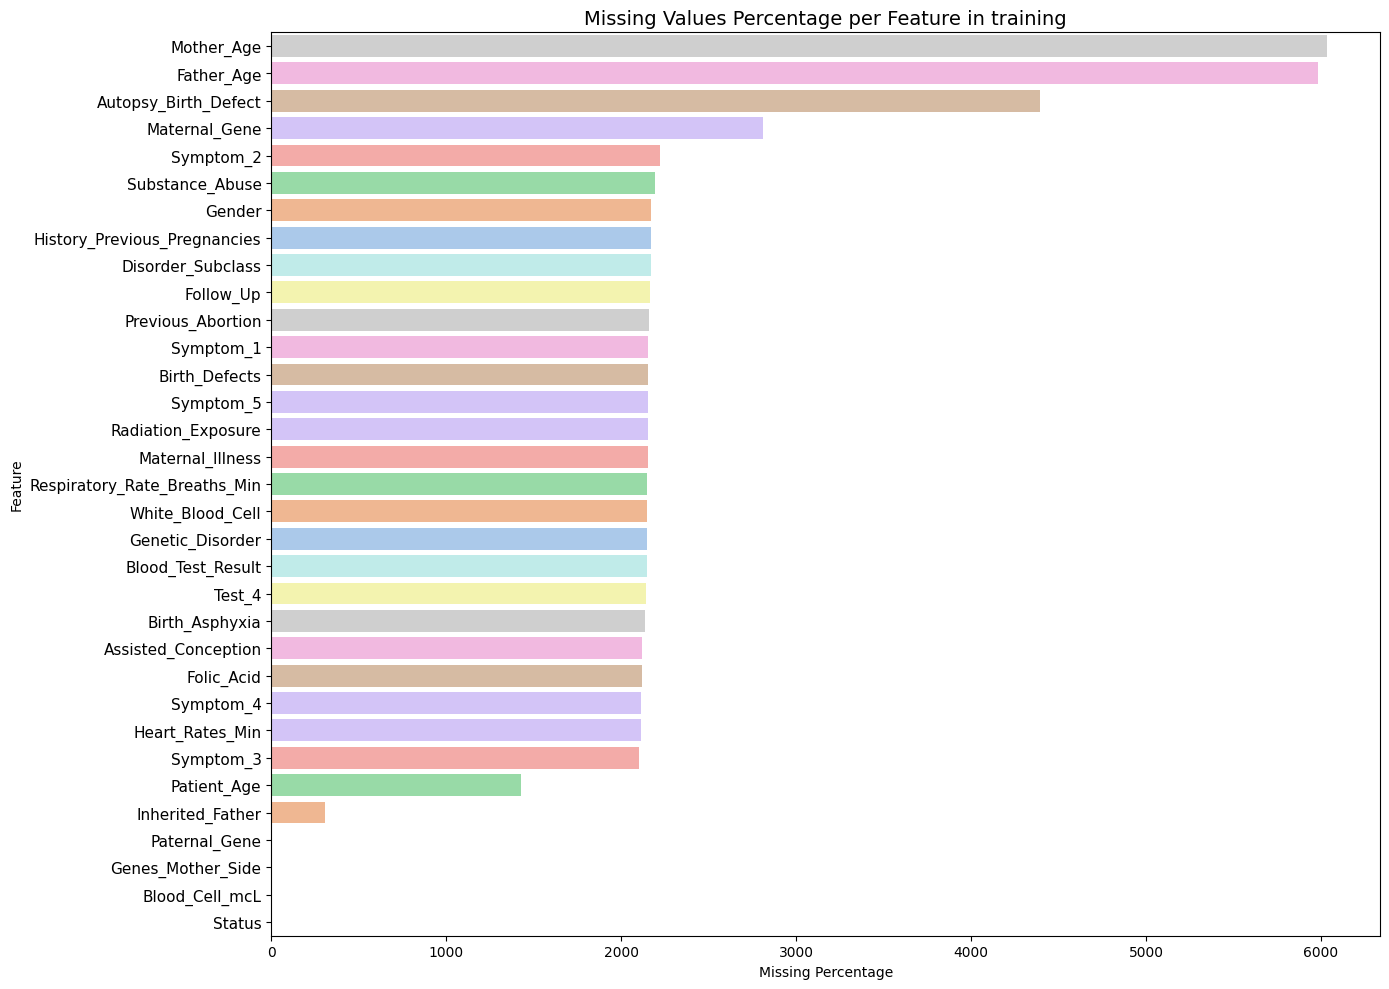

In [20]:
missing_train_sort = missing_train.sort_values(ascending=False)
plt.figure(figsize=(14,10))
sns.barplot(x=missing_train_sort.values, y=missing_train_sort.index, hue= missing_train_sort.values, palette='pastel', legend=False)
plt.title('Missing Values Percentage per Feature in training', fontsize=14)
plt.xlabel('Missing Percentage')
plt.ylabel('Feature')
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show();

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   9465 non-null   int64  
 1   Genes_Mother_Side             9465 non-null   object 
 2   Inherited_Father              8914 non-null   object 
 3   Maternal_Gene                 5742 non-null   object 
 4   Paternal_Gene                 9465 non-null   object 
 5   Blood_Cell_mcL                9465 non-null   float64
 6   Mother_Age                    9465 non-null   int64  
 7   Father_Age                    9465 non-null   int64  
 8   Status                        9465 non-null   object 
 9   Respiratory_Rate_Breaths_Min  6579 non-null   object 
 10  Heart_Rates_Min               6565 non-null   object 
 11  Test_4                        9465 non-null   int64  
 12  Follow_Up                     9465 non-null   object 
 13  Gen

In [22]:
missing_test=test.isnull().sum()
missing_test

,0
Patient_Age,0
Genes_Mother_Side,0
Inherited_Father,551
Maternal_Gene,3723
Paternal_Gene,0
Blood_Cell_mcL,0
Mother_Age,0
Father_Age,0
Status,0
Respiratory_Rate_Breaths_Min,2886


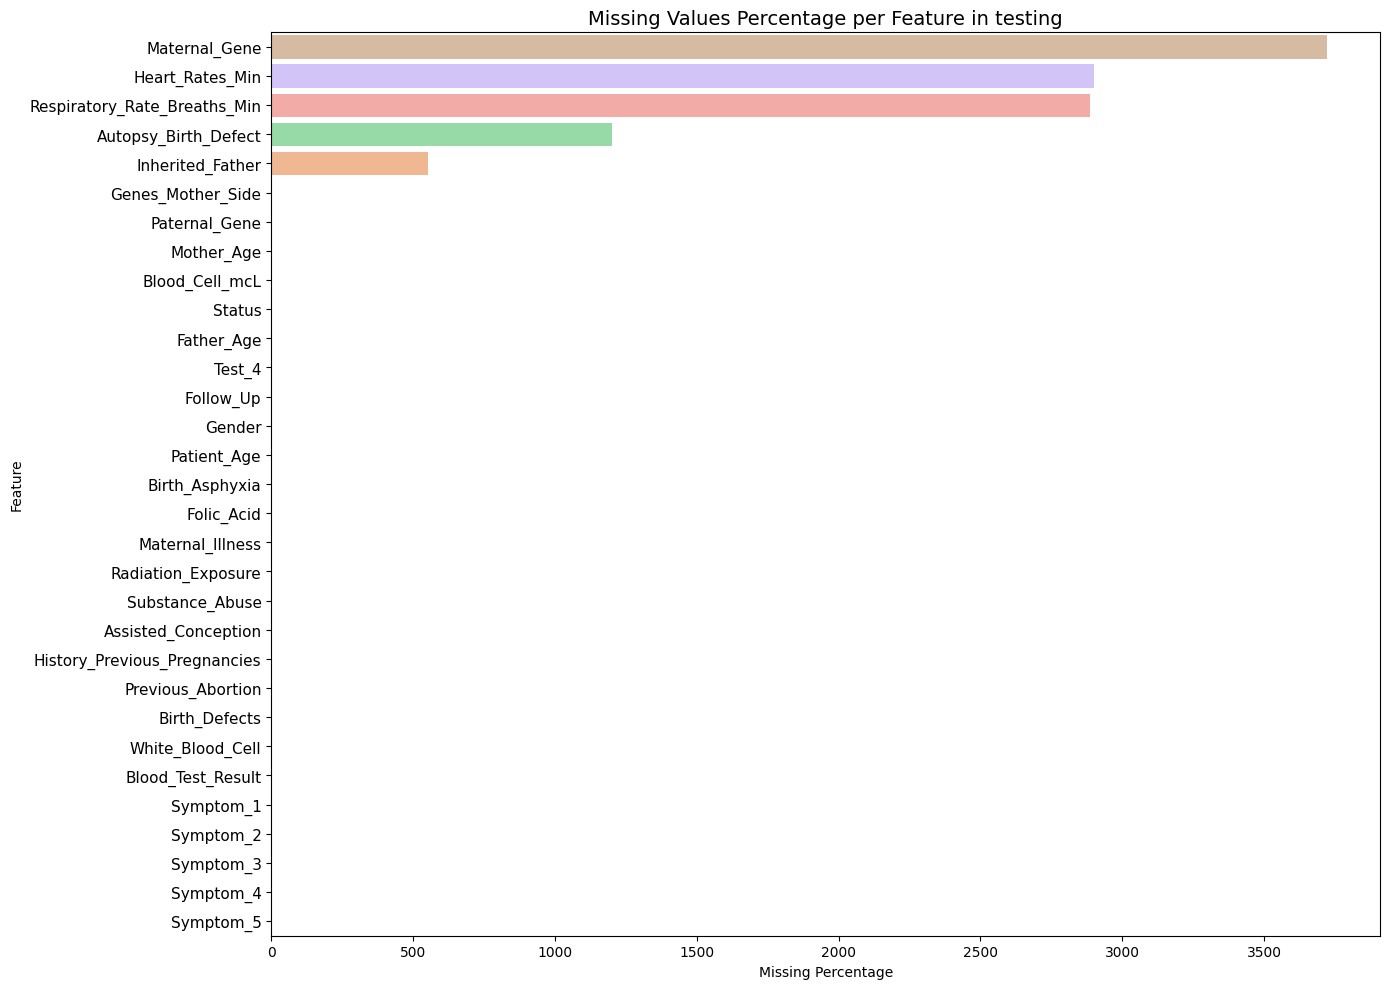

In [23]:
missing_train_sort = missing_test.sort_values(ascending=False)
plt.figure(figsize=(14,10))
sns.barplot(x=missing_train_sort.values, y=missing_train_sort.index, hue= missing_train_sort.values, palette='pastel', legend=False)
plt.title('Missing Values Percentage per Feature in testing', fontsize=14)
plt.xlabel('Missing Percentage')
plt.ylabel('Feature')
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show();

❓ What is the distribution of the target variable (Genetic_Disorder and Disorder_Subclass)?

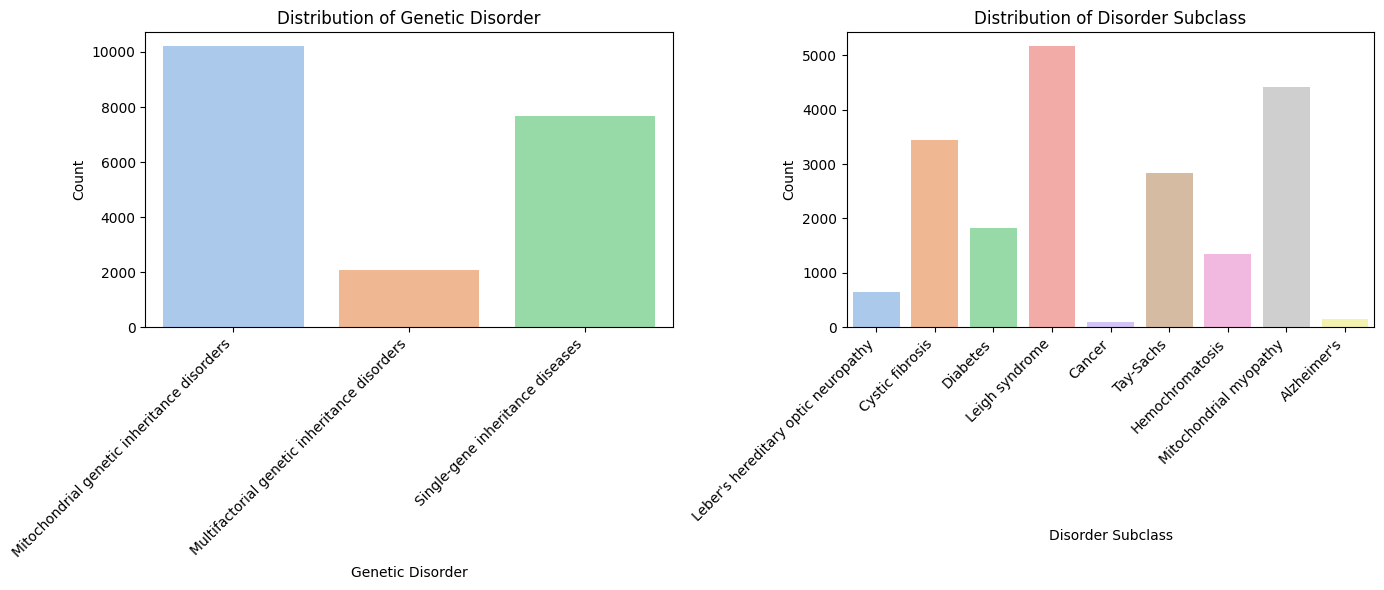

In [24]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
sns.countplot(data=train, x='Genetic_Disorder', hue='Genetic_Disorder', palette='pastel', legend=False)
plt.title('Distribution of Genetic Disorder')
plt.xlabel('Genetic Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='Disorder_Subclass', hue='Disorder_Subclass', palette='pastel', legend=False)
plt.title('Distribution of Disorder Subclass')
plt.xlabel('Disorder Subclass')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

❓ Plot the **histogram** of the number of unique values per categorical feature.

In [26]:
train_feat_categorical_nunique = train.select_dtypes(include='object').nunique()

In [27]:
train_feat_categorical_nunique.sum()

np.int64(60)

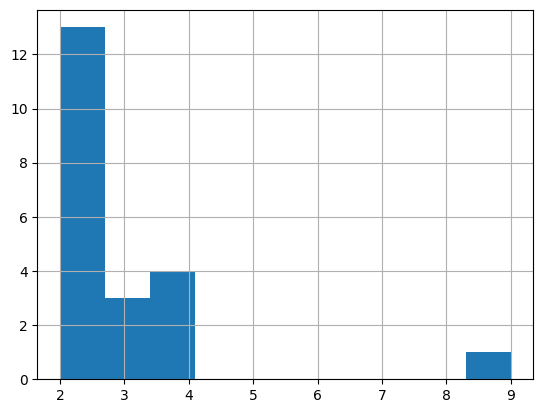

In [ ]:
train_feat_categorical_nunique.hist();

In [28]:
test_feat_categorical_nunique = test.select_dtypes(include='object').nunique()

In [29]:
test_feat_categorical_nunique.sum()

np.int64(62)

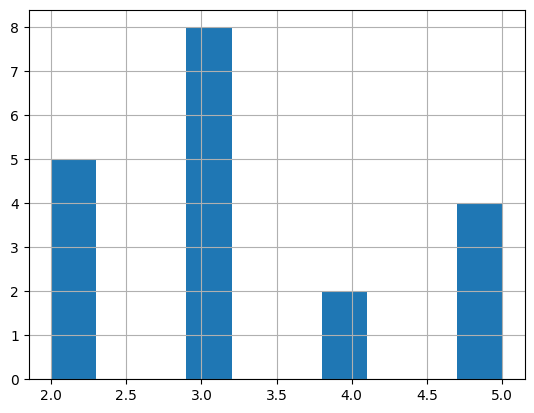

In [ ]:
test_feat_categorical_nunique.hist();

❓ Is the presence of specific genetic, maternal, or birth-related conditions associated with the occurrence of a genetic disorder (Genetic_Disorder) or its subclass (Disorder_Subclass) in the child?

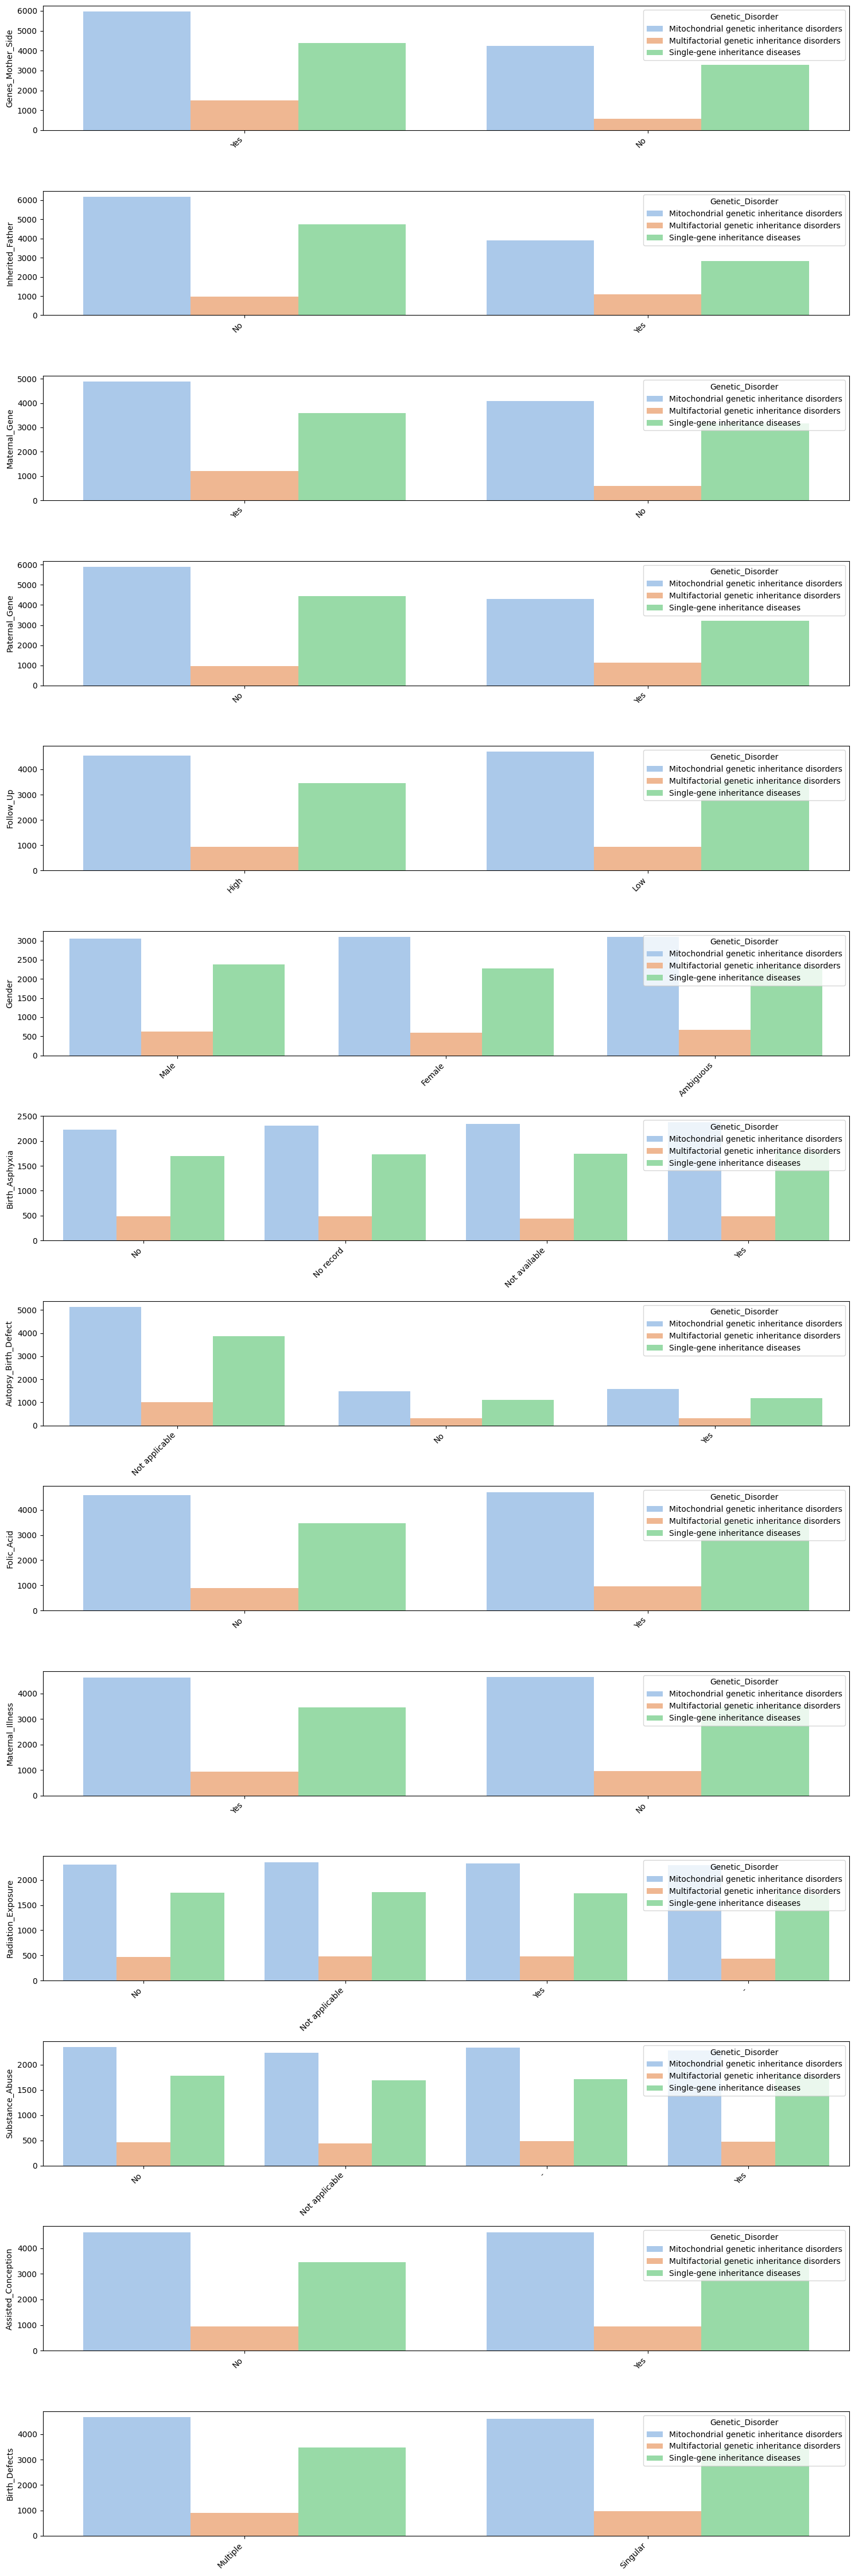

In [30]:
cols = [
    'Genes_Mother_Side', 'Inherited_Father', 'Maternal_Gene', 'Paternal_Gene',
    'Follow_Up', 'Gender', 'Birth_Asphyxia', 'Autopsy_Birth_Defect',
    'Folic_Acid', 'Maternal_Illness', 'Radiation_Exposure',
    'Substance_Abuse', 'Assisted_Conception', 'Birth_Defects'
]

plt.figure(figsize=(15, 45))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.countplot(data=train, x=col, hue='Genetic_Disorder', palette='pastel')
    plt.xlabel('')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


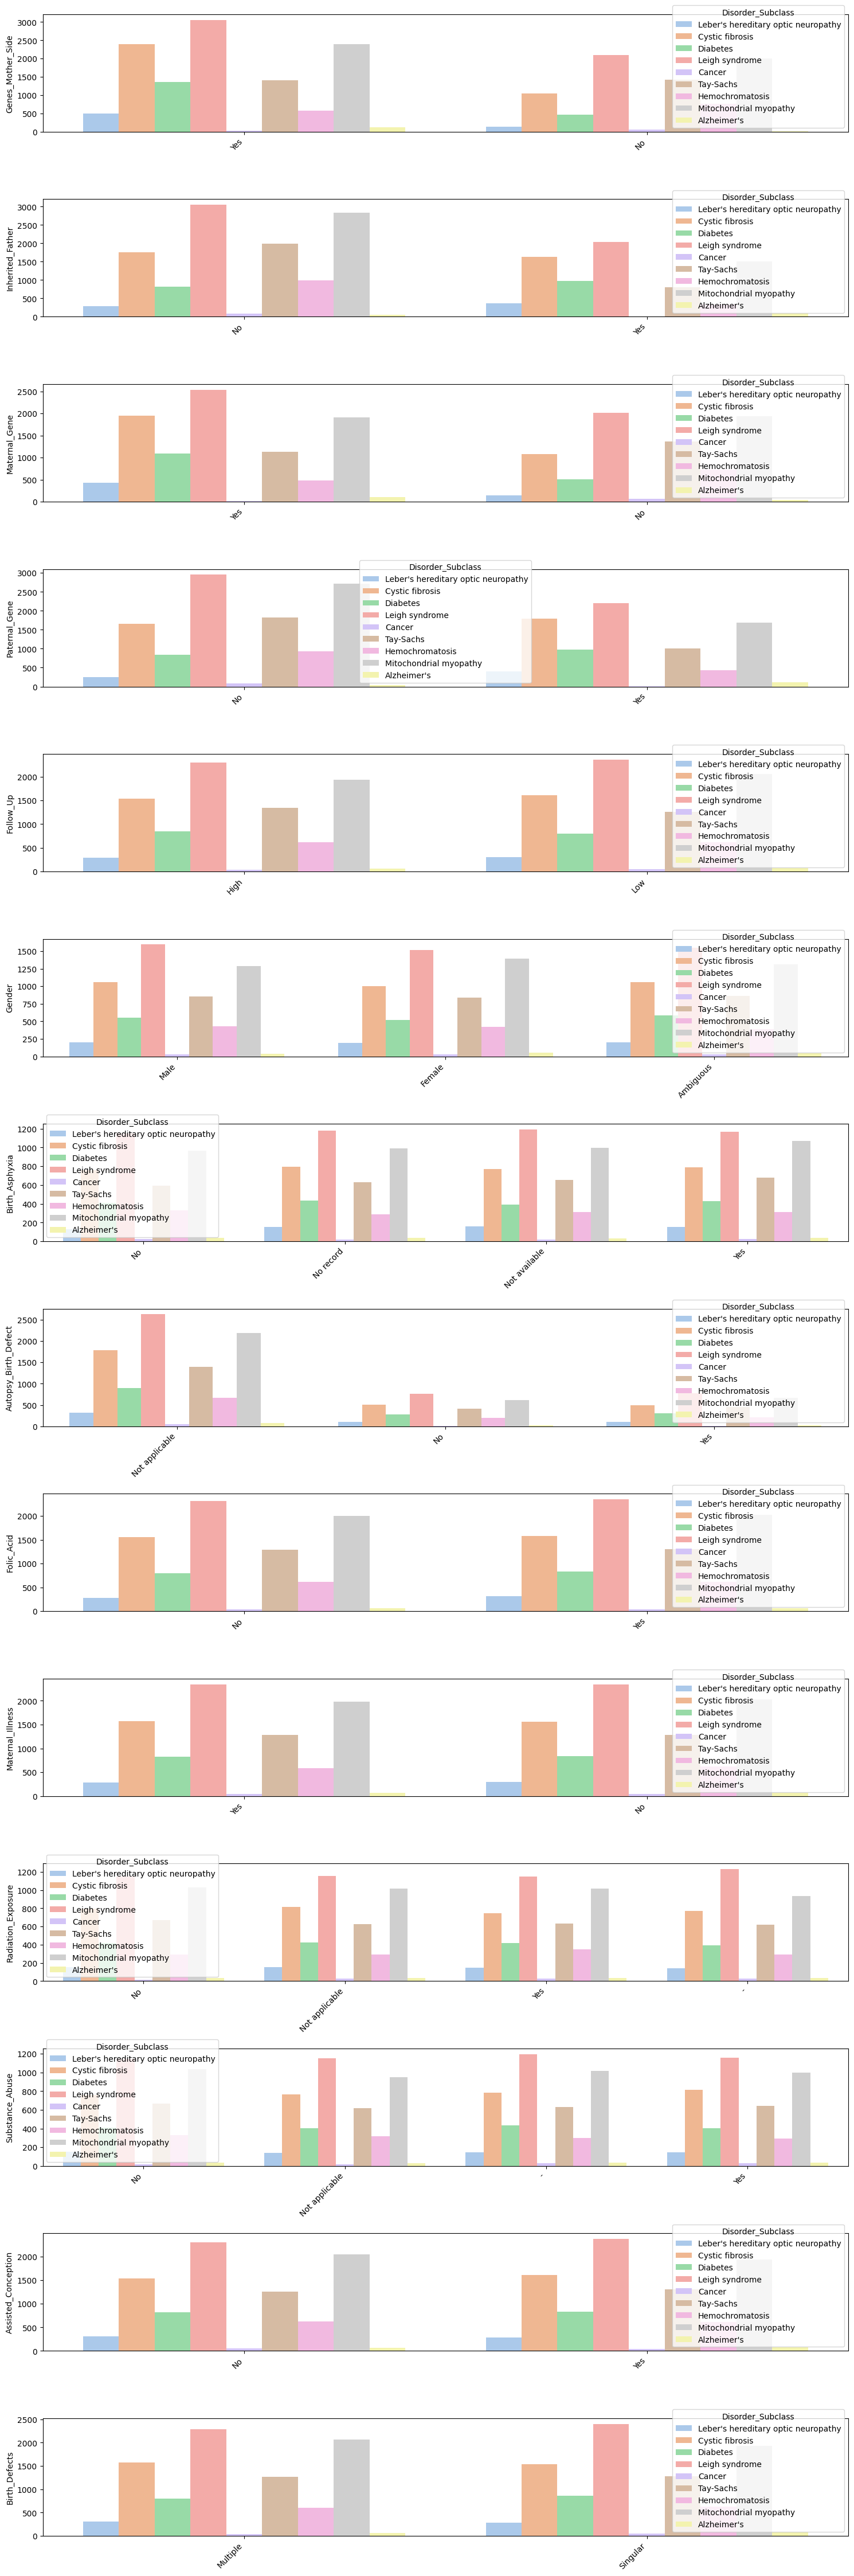

In [ ]:
plt.figure(figsize=(15, 45))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.countplot(data=train, x=col, hue='Disorder_Subclass', palette='pastel')
    plt.xlabel('')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

❓ How do the different symptoms (Symptom_1 to Symptom_5) vary across the test results (Test_4)?

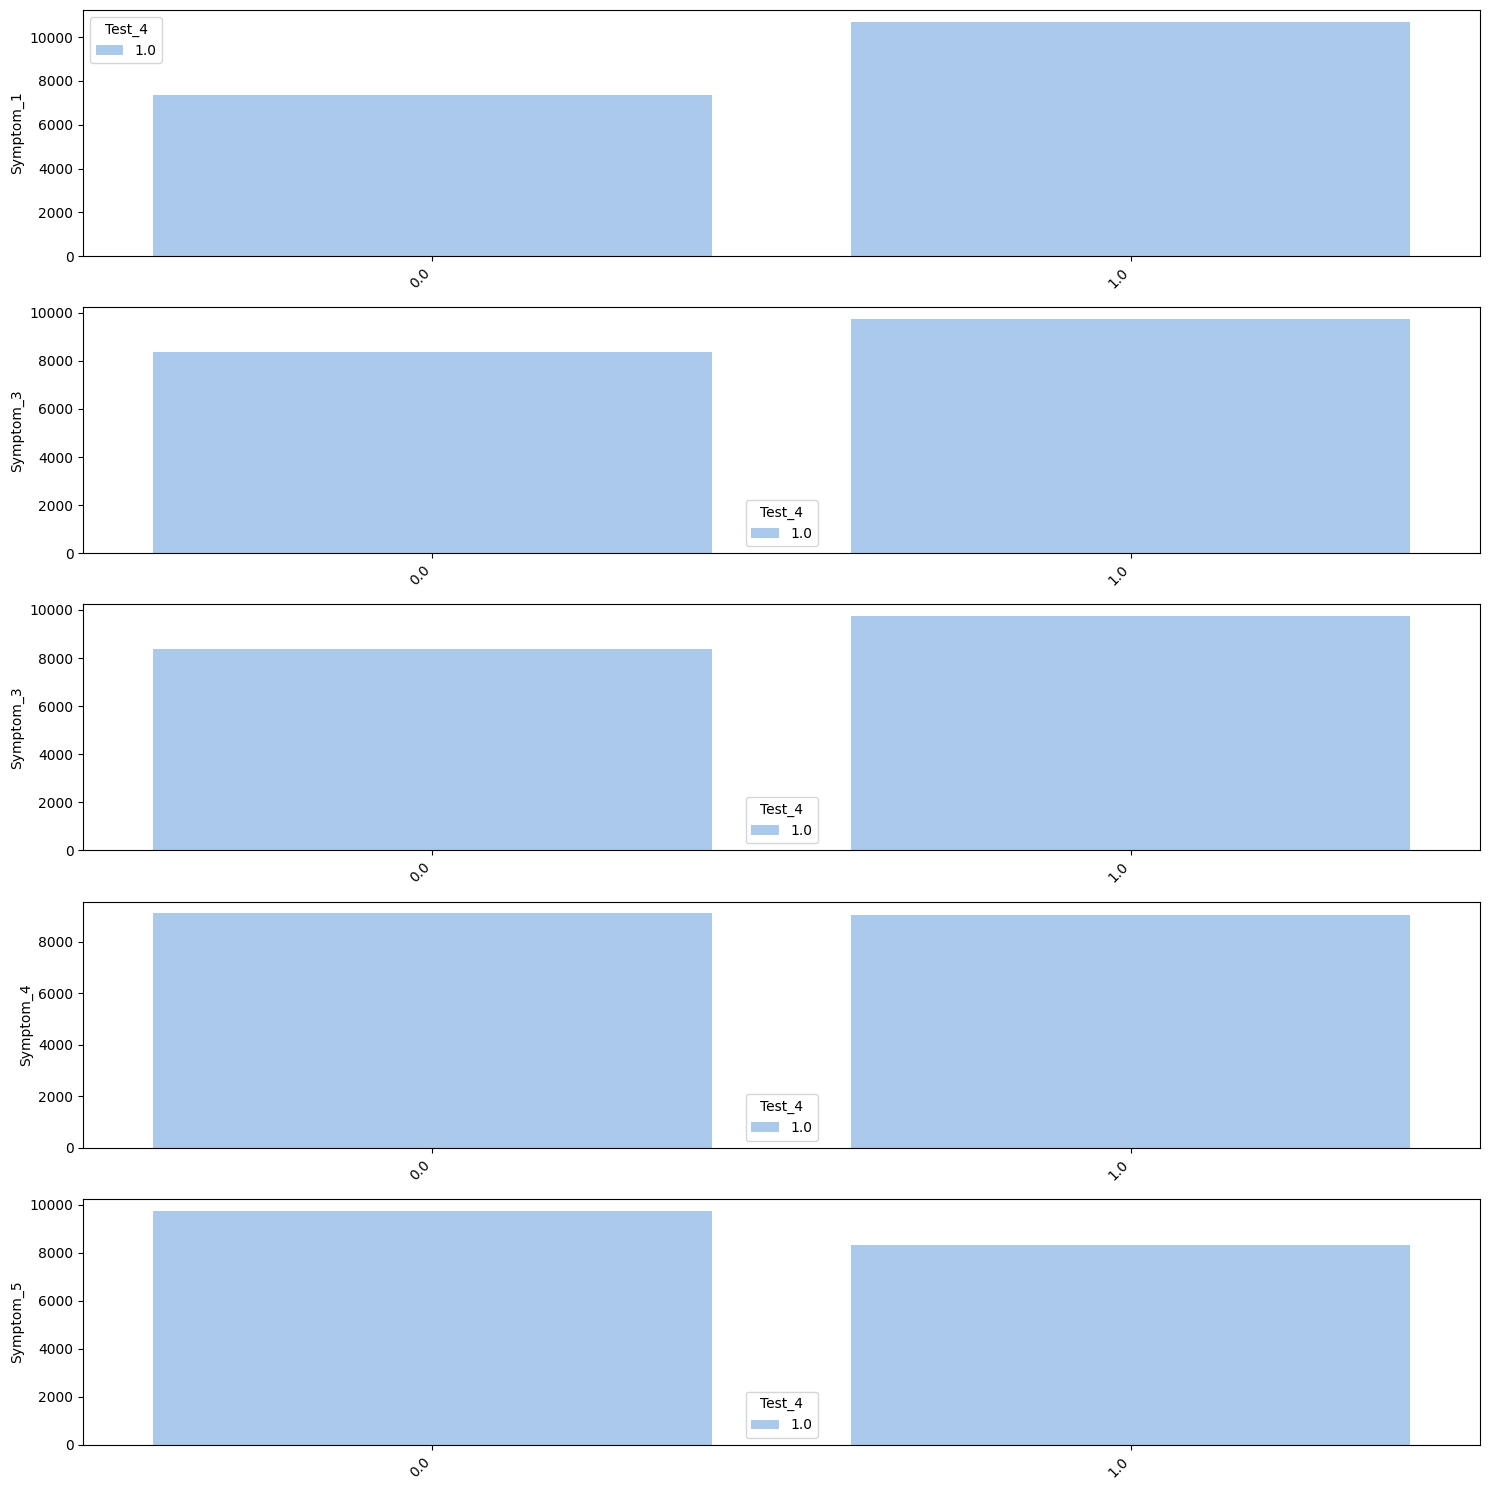

In [ ]:
symptom  = ['Symptom_1', 'Symptom_3', 'Symptom_3', 'Symptom_4', 'Symptom_5']
plt.figure(figsize=(15, 15))

for i, col in enumerate(symptom, 1):
    plt.subplot(len(symptom), 1, i)
    sns.countplot(data=train, x=col, hue='Test_4', palette='pastel')
    plt.xlabel('')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()